## July 9 2024 
Yoni sent mediaPipe and Yolov8 outputs from horizontal videos 

Goals to practice 

- Frames to time
    - add time column 
    
- code to plot stick figure at given frame  
    - alpha = confidence 
    

    
- Angles 
    - trunk lean 
    
- for practice 
    - stance width: distance between feet in pixels 
    - trunk velocity and acceleration in pixels 
    

## Import libraries 

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import os 

Questions

**Question:** *What are the units of MediaPipe and Yolo videos?*

**Question:** *From etl functions, looks like we are using "pose_landmarks", rather than "world_landmarks". World landmarks may be in meters with origin at center between the hips. Not sure how accurate, but we could test for distance travelled to get velocity?* 

**Question:** *framerate of videos?*

## Load and review MediaPipe data 

In [2]:
# read .csv file 
    # folder organization 
    #PoseEstimationPractice
        #code in one subfolder 
        #.csv file to read in folder ame data_output_csv
        
df_mp = pd.read_csv('..\data_output_csv\gait_horizontal_left_mediapipe_0.csv')

In [3]:
df_mp.head(n=5)

,Unnamed: 0,X,Y,Z,vis,pres,frame,label
0,0,367.261290,739.593503,-0.632737,0.998993,0.0,0,nose
1,1,356.884859,719.147816,-0.541763,0.998115,0.0,0,left_eye_inner
2,2,355.202840,718.922406,-0.542229,0.997278,0.0,0,left_eye
3,3,353.040587,718.605607,-0.542481,0.998061,0.0,0,left_eye_outer
4,4,352.153080,719.925722,-0.771942,0.998750,0.0,0,right_eye_inner


In [4]:
df_mp.dtypes

Unnamed: 0      int64
X             float64
Y             float64
Z             float64
vis           float64
pres          float64
frame           int64
label          object
dtype: object

In [5]:
df_mp.shape # (rows, columns)

(63195, 8)

In [6]:
# rename columns 
list(df_mp.columns)
df_mp = df_mp.rename(columns = {'Unnamed: 0':'label_num'})
df_mp.head()

,label_num,X,Y,Z,vis,pres,frame,label
0,0,367.261290,739.593503,-0.632737,0.998993,0.0,0,nose
1,1,356.884859,719.147816,-0.541763,0.998115,0.0,0,left_eye_inner
2,2,355.202840,718.922406,-0.542229,0.997278,0.0,0,left_eye
3,3,353.040587,718.605607,-0.542481,0.998061,0.0,0,left_eye_outer
4,4,352.153080,719.925722,-0.771942,0.998750,0.0,0,right_eye_inner


In [7]:
# min and max to standardize plot axes  
x_min = min(df_mp['X'])
x_max = max(df_mp['X'])
y_min = min(df_mp['Y'])
y_max = max(df_mp['Y'])
z_min = min(df_mp['Z'])
z_max = max(df_mp['Z'])

## -------------------All Labels -------------------------
### #1 - 2D plot of all labels, single frame

Select all rows from current_frame

In [8]:
current_frame1 = 200 

current_frame_df1 = df_mp.loc[df_mp['frame'] == current_frame1]
current_frame_df1

,label_num,X,Y,Z,vis,pres,frame,label
6600,0,2323.387264,818.673062,-0.371116,0.999301,0.0,200,nose
6601,1,2311.264765,798.773056,-0.335499,0.998669,0.0,200,left_eye_inner
6602,2,2308.732869,798.261858,-0.335617,0.998674,0.0,200,left_eye
6603,3,2305.752533,797.568871,-0.335632,0.998757,0.0,200,left_eye_outer
6604,4,2309.869600,798.597807,-0.462956,0.998898,0.0,200,right_eye_inner
6605,5,2306.675288,798.140586,-0.463051,0.999027,0.0,200,right_eye
6606,6,2303.020627,797.585156,-0.463166,0.999001,0.0,200,right_eye_outer
6607,7,2276.928013,803.555229,-0.109310,0.997540,0.0,200,left_ear
6608,8,2276.771067,804.659027,-0.696618,0.998916,0.0,200,right_ear
6609,9,2315.656239,836.666665,-0.268115,0.998584,0.0,200,mouth_left


Plot all points and label with marker label 
- original plot was upside down. switched to -Y values to orient in what looks like right side up video

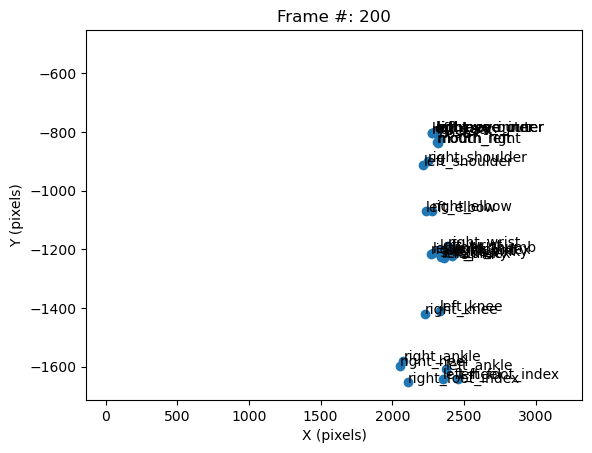

In [9]:
# save x y and label as vector  
x = current_frame_df1[['X']]
y = current_frame_df1[['Y']]
label = current_frame_df1['label']

# create figure and ax
fig = plt.figure()
ax = fig.add_subplot(111)

#plot scatter plot 
plt.scatter(current_frame_df1['X'], -current_frame_df1['Y']) # negative Y to flip image with feet on ground 
plt.xlabel("X (pixels)")
plt.ylabel("Y (pixels)")

# add text 
for i, txt in enumerate(label):
    ax.text(current_frame_df1.iloc[i]['X'], -current_frame_df1.iloc[i]['Y'], txt)
    
plt.xlim(x_min, x_max)
plt.ylim(-y_max, -y_min) # flip to match negative y 
plt.title("Frame #: " + str(current_frame1))

# display figure
plt.show()


In [ ]:
df_mp.loc[df_mp['label'] == current_frame2]

### #2 - 2D plot of all labels, for loop to run through multiple frames 

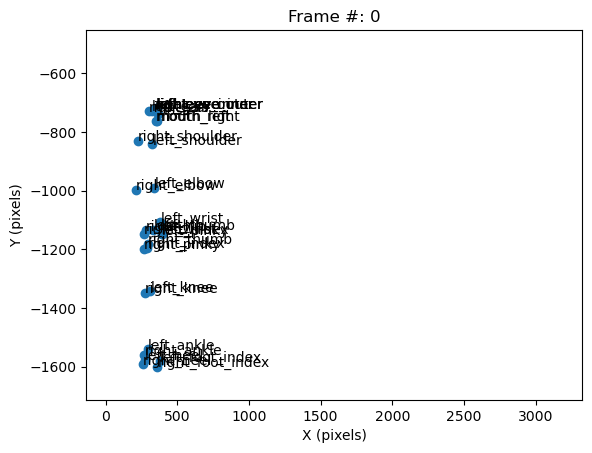

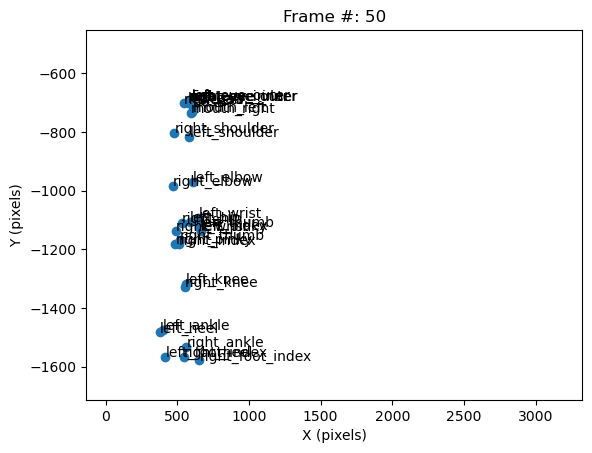

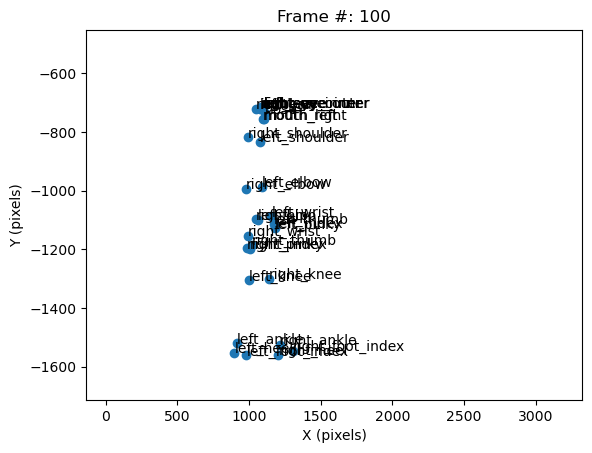

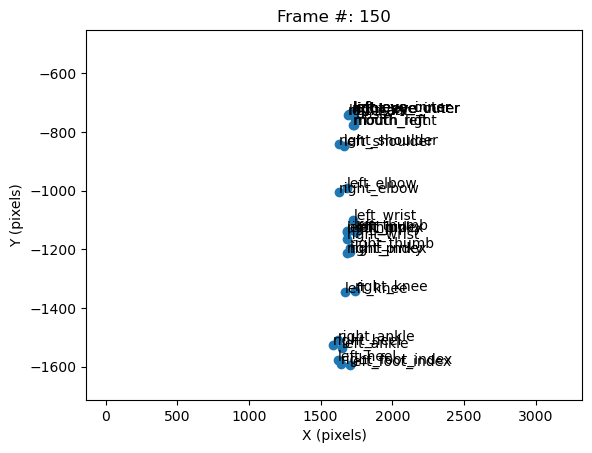

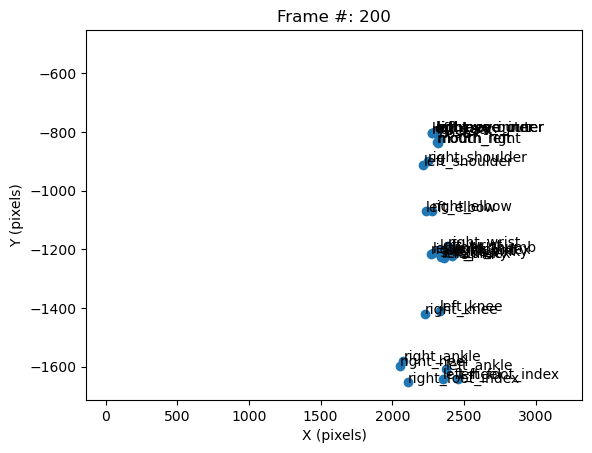

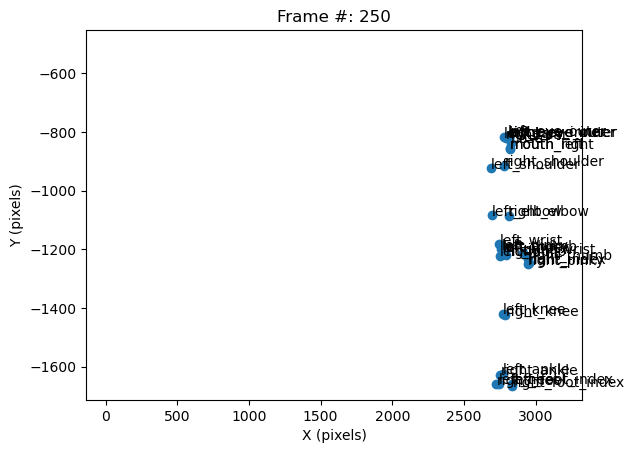

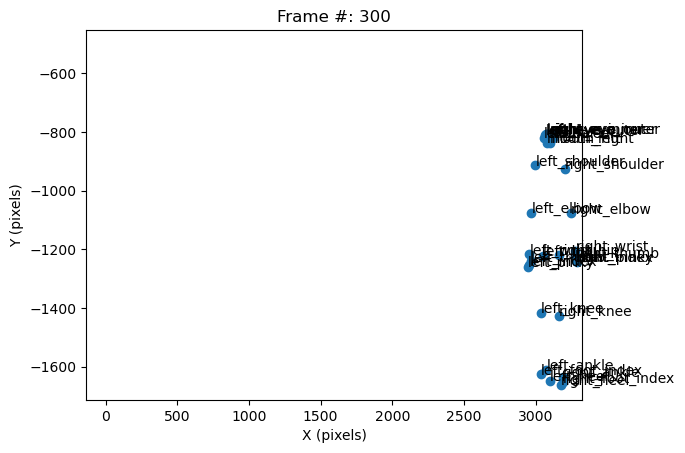

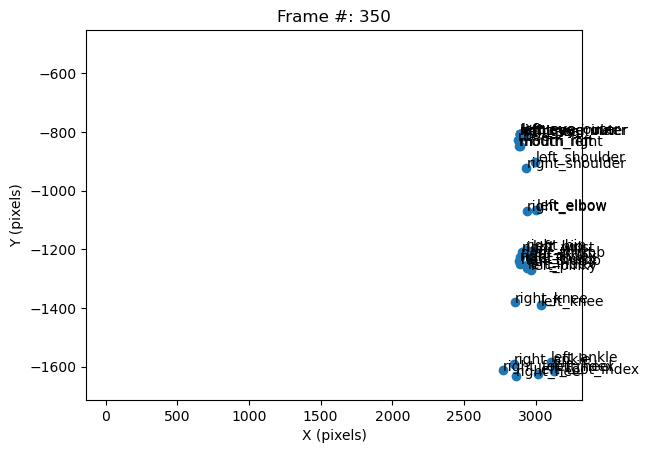

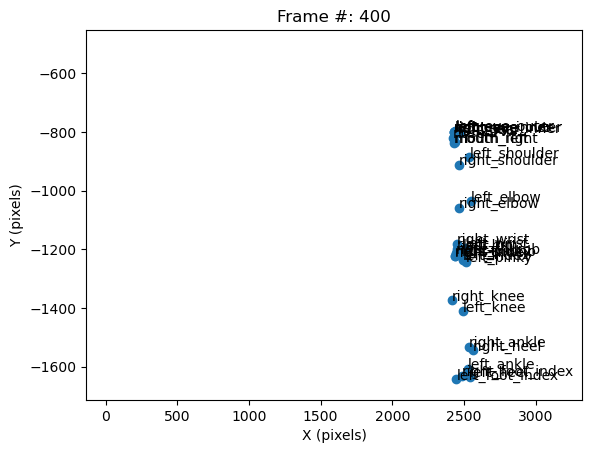

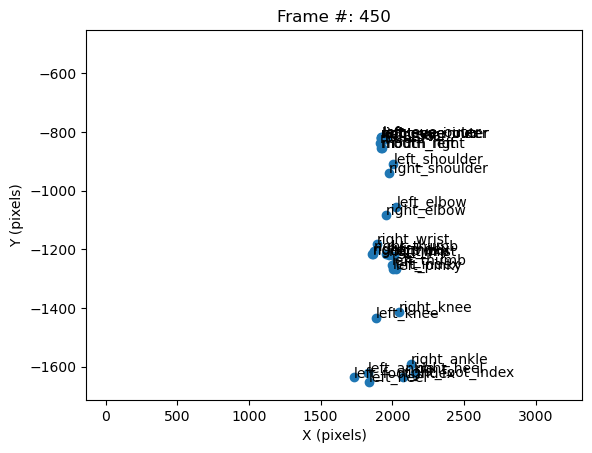

In [10]:
# 2D plot as for loop 

frames2 = range(0,500,50) #start, stop, step

for current_frame2 in frames2: 
    # pull rows that correspond to current_frame2
    current_frame_df2 = df_mp.loc[df_mp['frame'] == current_frame2]
    
    # save x y and label as vector  
    x = current_frame_df2[['X']]
    y = current_frame_df2[['Y']]
    label = current_frame_df2['label']
    
    # create figure and ax
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    #plot scatter plot 
    plt.scatter(current_frame_df2['X'], -current_frame_df2['Y']) # negative Y to flip image with feet on ground 
    plt.xlabel("X (pixels)")
    plt.ylabel("Y (pixels)")

    # add text 
    for i, txt in enumerate(label):
        ax.text(current_frame_df2.iloc[i]['X'], -current_frame_df2.iloc[i]['Y'], txt)
    
    plt.xlim(x_min, x_max)
    plt.ylim(-y_max, -y_min) # flip to match negative y 
    plt.title("Frame #: " + str(current_frame2))
 
    # display figure
    plt.show()

### #3 - 3D Plot of all labels, one frame  

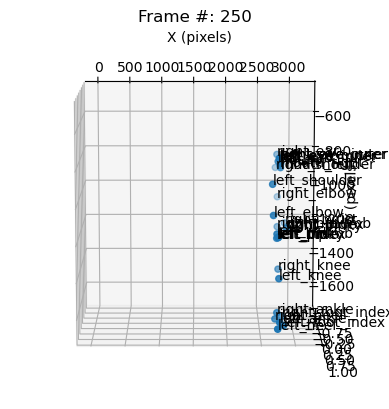

In [11]:
current_frame3 = 250 

current_frame_df3 = df_mp.loc[df_mp['frame'] == current_frame3]
current_frame_df3

fig_labels = plt.figure()
ax = plt.axes(projection = '3d')
ax.scatter3D(current_frame_df3['X'], -current_frame_df3['Y'], current_frame_df3['Z'])
plt.xlabel("X (pixels)")
plt.ylabel("Y (pixels)")

# add text 
for i, txt in enumerate(label):
    ax.text(current_frame_df3.iloc[i]['X'], -current_frame_df3.iloc[i]['Y'], current_frame_df3.iloc[i]['Z'], txt)
    
plt.xlim(x_min, x_max)
plt.ylim(-y_max, -y_min) # flip to match negative y 
plt.title("Frame #: " + str(current_frame3))

ax.view_init(100, -90, 0)

### #4 - 3D plot all markers, for loop through multiple frames 

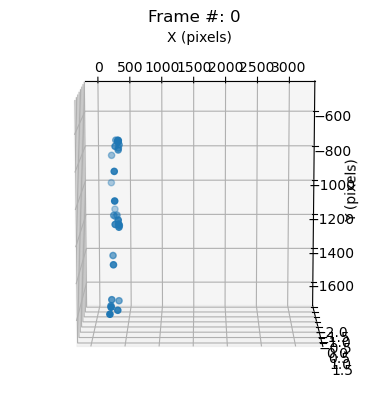

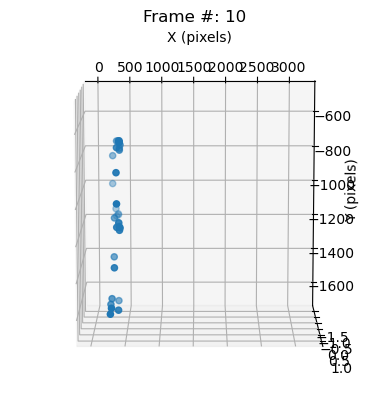

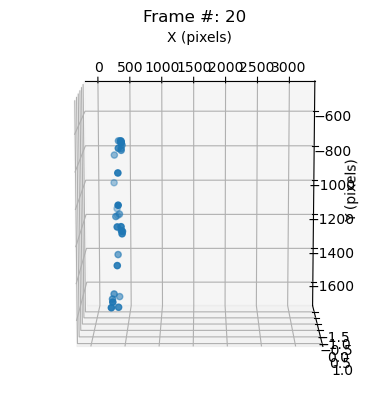

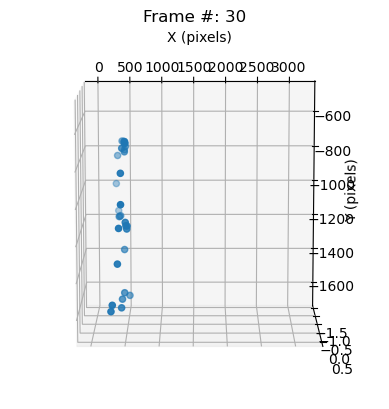

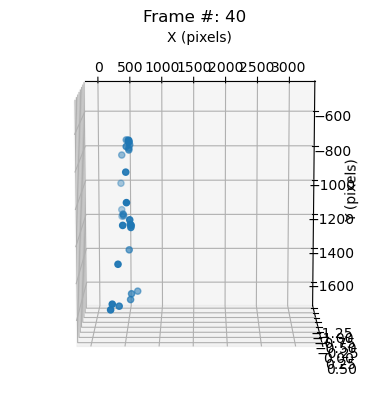

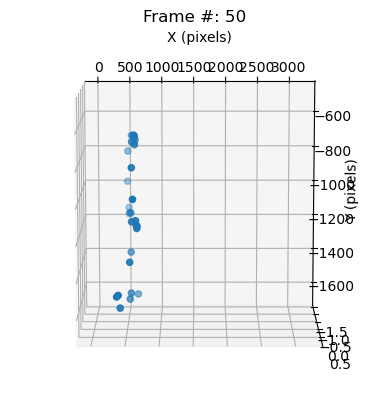

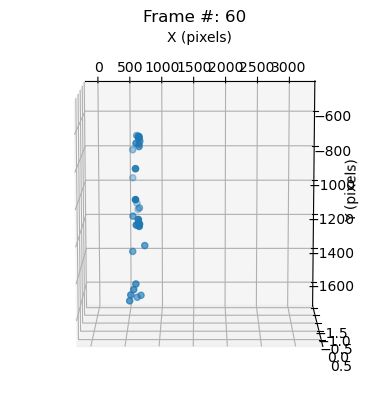

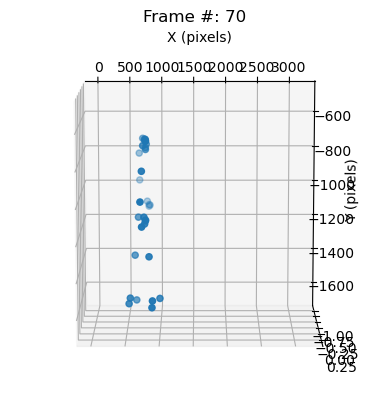

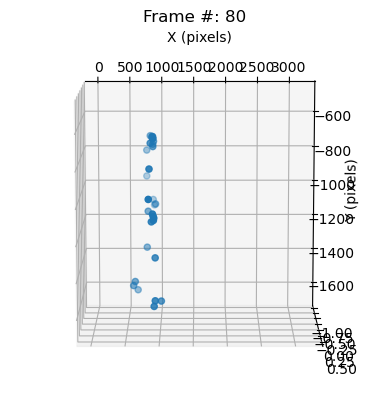

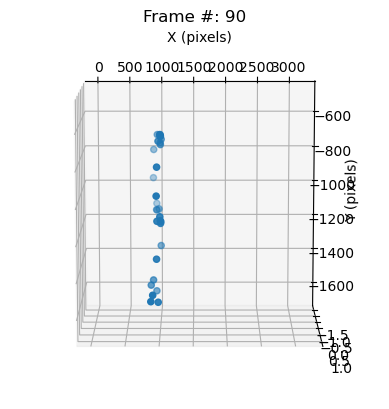

In [12]:
frames4 = range(0,100,10) #start, stop, step

for current_frame4 in frames4: 
    # pull rows that correspond to current_frame2
    current_frame_df4 = df_mp.loc[df_mp['frame'] == current_frame4]

    # plot 
    fig_labels = plt.figure()
    ax = plt.axes(projection = '3d')
    ax.scatter3D(current_frame_df4['X'], -current_frame_df4['Y'], current_frame_df4['Z'])
    plt.xlabel("X (pixels)")
    plt.ylabel("Y (pixels)")

    # add text with labels 
    #for i, txt in enumerate(label):
        #ax.text(current_frame_df4.iloc[i]['X'], -current_frame_df4.iloc[i]['Y'], current_frame_df4.iloc[i]['Z'], txt)
    
    plt.xlim(x_min, x_max)
    plt.ylim(-y_max, -y_min) # flip to match negative y 
    plt.title("Frame #: " + str(current_frame4))

    ax.view_init(100, -90, 0)